In [238]:
import pandas as pd
sales = pd.read_csv('sales_c.csv', encoding = 'utf-8', dtype = {'Quantity':'Int8', 'Store ID':'Int8', 'Employee ID':'Int8'})
group_sales = pd.read_csv('group_sales_c.csv', encoding = 'utf-8', dtype = {'Quantity':'Int8', 'Store ID':'Int8', 'Employee ID':'Int8'})
customers = pd.read_csv('customers_c.csv', encoding = 'utf-8', dtype = {'Customer ID':'Int32', 'Gender':'category'})
employees = pd.read_csv('employees_c.csv', encoding = 'utf-8', dtype = {'Employee ID':'Int16', 'Store ID':'Int8'})
products = pd.read_csv('products_c.csv', encoding = 'utf-8', dtype = {'Product ID':'Int32', 'Category':'category'})
stores = pd.read_csv('stores_c.csv', encoding = 'utf-8', dtype = {'Store ID':'Int8', 'Number of Employees':'Int8'})

In [239]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Invoice ID     600000 non-null  object 
 1   Customer ID    600000 non-null  int64  
 2   Product ID     600000 non-null  int64  
 3   Unit Price     600000 non-null  float64
 4   Quantity       600000 non-null  Int8   
 5   Date           600000 non-null  object 
 6   Discount       600000 non-null  float64
 7   Line Total     600000 non-null  float64
 8   Store ID       600000 non-null  Int8   
 9   Employee ID    600000 non-null  Int8   
 10  Invoice Total  600000 non-null  float64
dtypes: Int8(3), float64(4), int64(2), object(2)
memory usage: 40.1+ MB


In [240]:
# analisis

# total sale each months over years
sales = sales.astype({'Date':'datetime64[ns]'})
sales[['Line Total', 'Invoice Total']] = sales[['Line Total', 'Invoice Total']].round(2)
((sales.pivot_table(index = [sales['Date'].dt.year], columns = [sales['Date'].dt.month], values = 'Invoice Total', aggfunc = 'sum')/1e6).
        rename_axis(index='Year', columns='Month').
# The purpose of dividing 1 million by the total amount is for an intuitive outcome    
        style.background_gradient(cmap = 'RdYlGn', axis = 1))

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2023,3.326818,1.491273,4.045265,3.415160,2.865103,2.686192,2.728029,1.935769,4.922455,3.141811,1.524134,3.981947
2024,1.254086,0.481657,1.821752,1.320852,1.288256,1.188370,0.842321,1.058626,1.982790,2.081192,1.566525,3.121135
2025,3.122089,1.148892,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


<Axes: title={'center': 'Peak of sales in a day'}, xlabel='Time (24-hour clock)', ylabel='Total sales(million)'>

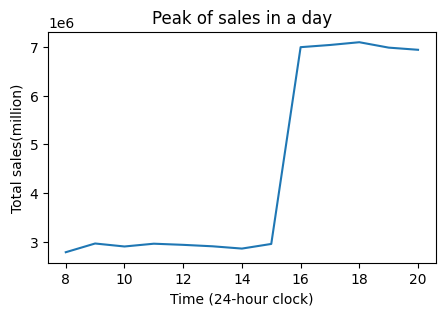

In [241]:
# sales trend over time
# total sales by time period
(sales.groupby([sales['Date'].dt.hour])['Invoice Total'].sum()).plot(figsize = (5,3), title = 'Peak of sales in a day', xlabel = 'Time (24-hour clock)', ylabel = 'Total sales(million)')

In [242]:
# product performance
# merge two table 'sales' and 'products' for the favoring of analysis
s_p = sales.merge(products, how = 'inner', left_on = 'Product ID', right_on = 'Product ID')
s_p.head()

,Invoice ID,Customer ID,Product ID,Unit Price,Quantity,Date,Discount,Line Total,Store ID,Employee ID,Invoice Total,Category,Sub Category,Production Cost
0,INV-US-001-04128642,268,1130,59.0,1,2023-01-01 20:23:00,0.4,35.4,1,5,144.9,Masculine,Coats and Blazers,42.21
1,INV-US-001-04128642,268,1694,34.5,1,2023-01-01 20:23:00,0.4,20.7,1,5,144.9,Feminine,Shirts and Blouses,5.66
2,INV-US-001-04128642,268,35,29.0,1,2023-01-01 20:23:00,0.4,17.4,1,5,144.9,Feminine,Sportswear,8.15
3,INV-US-001-04128642,268,1340,25.5,1,2023-01-01 20:23:00,0.4,15.3,1,5,144.9,Masculine,T-shirts and Polos,16.24
4,INV-US-001-04128642,268,2202,24.5,1,2023-01-01 20:23:00,0.4,14.7,1,5,144.9,Masculine,Sportswear,3.73


In [243]:
# the top 10 popular products
s_p.groupby(['Product ID', 'Sub Category'])['Quantity'].sum().sort_values(ascending = False).head(10)

Product ID  Sub Category
6619        Shirts          142
6437        Shirts          141
8026        Sportswear      139
8494        Sportswear      138
8676        Sportswear      137
8208        Sportswear      135
6544        Sportswear      135
7064        Sportswear      134
7480        Sportswear      134
7584        Sportswear      133
Name: Quantity, dtype: Int64

In [244]:
# 10 most profitable products
s_p['Total Profit'] =s_p.apply(lambda x:(x['Line Total']-(x['Production Cost']*x['Quantity'])), axis = 1)
s_p.groupby(['Product ID', 'Sub Category'])['Total Profit'].sum().sort_values(ascending = False).head(10)

Product ID  Sub Category     
5243        Suits and Blazers    10493.90
4021        Suits and Blazers    10267.00
4047        Suits and Blazers     9480.45
5555        Suits and Blazers     9185.00
3293        Suits and Blazers     9042.58
7583        Suits and Blazers     8840.91
5841        Suits and Blazers     8752.86
3189        Suits and Blazers     8646.78
4775        Suits and Blazers     8645.13
5919        Suits and Blazers     8472.93
Name: Total Profit, dtype: float64

In [245]:
# 10 most unprofitable products
s_p.groupby(['Product ID', 'Sub Category'])['Total Profit'].sum().sort_values().head(10)

Product ID  Sub Category     
1525        Suits and Blazers   -531.02
1655        Suits and Blazers   -484.64
1256        Suits and Sets      -444.84
2045        Suits and Blazers   -442.22
355         Suits and Blazers   -435.44
1052        Coats and Blazers   -400.50
554         Suits and Sets      -385.34
95          Suits and Blazers   -363.48
511         Suits and Blazers   -362.04
953         Suits and Blazers   -347.84
Name: Total Profit, dtype: float64

<Axes: title={'center': 'Totoal profit each month'}, ylabel='Total Profit (million)'>

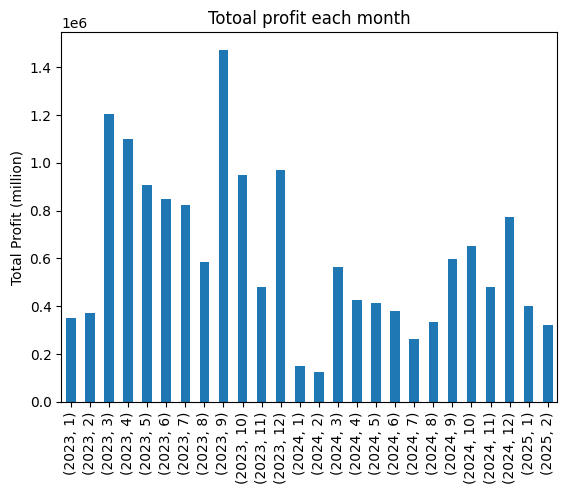

In [246]:
# profit of each month
s_p.groupby([s_p['Date'].dt.year, s_p['Date'].dt.month])['Total Profit'].sum().plot.bar(title = 'Totoal profit each month', xlabel = '', ylabel = 'Total Profit (million)')

In [247]:
# 5 most profitable product in Sep 2023
s_p.loc[(s_p['Date'].dt.year == 2023) & (s_p['Date'].dt.month == 8)].groupby(['Sub Category','Product ID'])['Total Profit'].sum().sort_values(ascending = False).head()

Sub Category       Product ID
Suits and Blazers  3189          1460.70
Suits and Sets     5494          1450.72
                   5858          1384.16
Suits and Blazers  3735          1368.18
                   5659          1349.80
Name: Total Profit, dtype: float64

<Axes: title={'center': 'Total Sales Each Store'}, xlabel='City and Store', ylabel='Total sales (million)'>

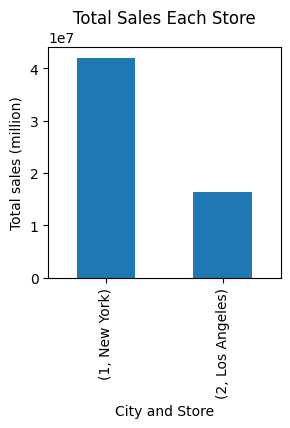

In [248]:
# store and employee comparison
# stores perform the best
s_p_st = s_p.merge(stores, how = 'inner',left_on = 'Store ID', right_on = 'Store ID')
s_p_st.groupby(['Store ID', 'City'])['Invoice Total'].sum().plot.bar(figsize = (3,3), title = 'Total Sales Each Store', xlabel = 'City and Store', ylabel = 'Total sales (million)')

In [249]:
# employees perform
s_p_e = s_p.merge(employees, how = 'inner', left_on = 'Employee ID', right_on = 'Employee ID')
s_p_e.groupby(['Employee ID','Store ID_x','Name']).agg({'Total Profit':'sum'})

,,,Total Profit
Employee ID,Store ID_x,Name,
2,1,Gabriel Cunningham,2305239.63
3,1,Timothy Fernandez,2276107.76
4,1,Natalie Rogers,2264375.33
5,1,Elizabeth Cantrell,2254691.51
6,1,Melissa Tran,2275585.95
8,2,Shannon Alvarez,575212.29
9,2,Frank Daniel,573180.43
10,2,James Burnett,570319.43
11,2,Jessica Maldonado,566550.93


In [250]:
# the most frequent customers and their average spending
gs_c = group_sales.merge(customers, how = 'inner', on = 'Customer ID')
purchase_times = gs_c.groupby(['Customer ID', 'Gender']).agg({'Invoice ID':'count', 'Invoice Total':'sum'})
purchase_times.rename(columns = {'Invoice ID':'Purchase times'}, inplace = True)
purchase_times.sort_values(['Purchase times'], ascending = False).head(10)

C:\Users\123\AppData\Local\Temp\ipykernel_19560\457328901.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_times = gs_c.groupby(['Customer ID', 'Gender']).agg({'Invoice ID':'count', 'Invoice Total':'sum'})


,,Purchase times,Invoice Total
Customer ID,Gender,,
47005,F,24,2254.05
20159,F,23,4043.03
37304,F,23,2007.58
35600,F,22,4517.15
16632,F,22,2027.40
10005,F,22,2812.20
20796,F,22,2123.76
6520,F,22,1269.96
15084,F,22,3105.91


<Axes: title={'center': 'Most popular product among the top 100 frequent customers'}, ylabel='Quantity'>

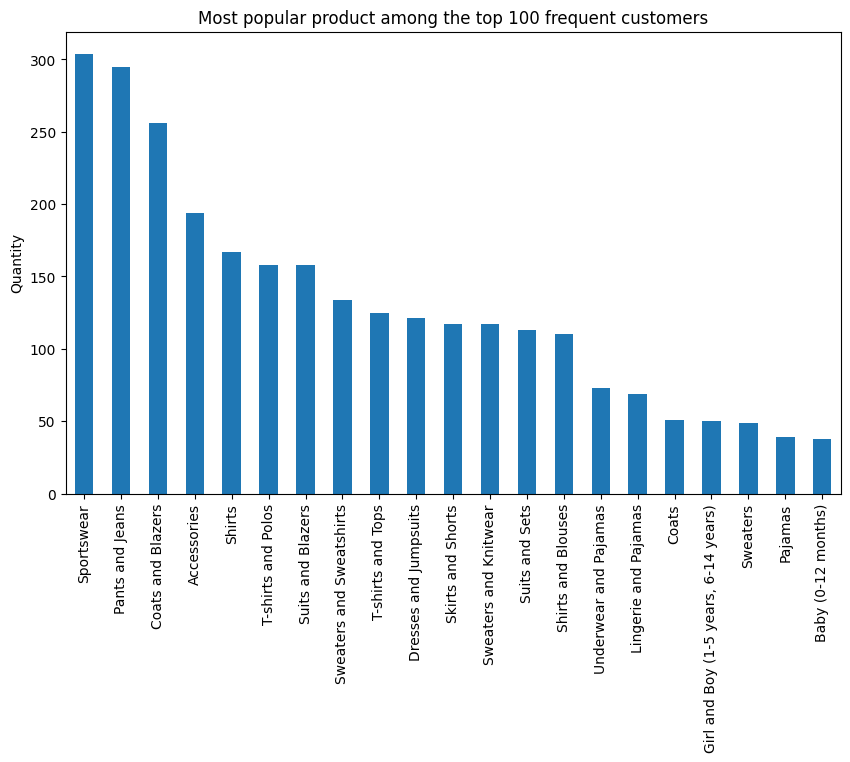

In [251]:
# Most popular product among the top 100 frequent customers

# the most 100 frequent consumers
best100 = purchase_times.sort_values('Purchase times', ascending = False).reset_index().head(100)
# append customer id to a list 
best100list = best100['Customer ID'].tolist()
# merge sales and products 
s_p = sales.merge(products, how = 'inner', left_on = 'Product ID', right_on = 'Product ID')
# count the most 5 popular subcategory
s_p.loc[s_p['Customer ID'].isin(best100list)].value_counts('Sub Category').plot.bar(figsize = (10,6),title = 'Most popular product among the top 100 frequent customers', xlabel = '', ylabel = 'Quantity')

C:\Users\123\AppData\Local\Temp\ipykernel_19560\4030331245.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gs_c.groupby('Gender')['Invoice Total'].mean().plot.bar(figsize = (3,3), color = ['yellow', 'pink', 'blue'])


<Axes: xlabel='Gender'>

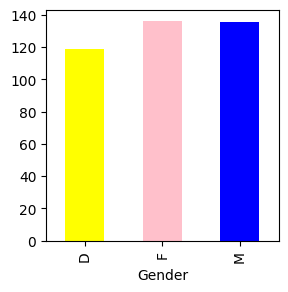

In [252]:
# gender-based purchasing pattern
# average spending of order by gender-based
gs_c = group_sales.merge(customers, how = 'inner', on = 'Customer ID')
gs_c.groupby('Gender')['Invoice Total'].mean().plot.bar(figsize = (3,3), color = ['yellow', 'pink', 'blue'])